In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import tree
from sklearn import linear_model

# Microsoft Corporation

Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsoft products. Its More Personal Computing segment provides Windows original equipment manufacturer (OEM) licensing and other non-volume licensing of the Windows operating system; Windows Commercial, such as volume licensing of the Windows operating system, Windows cloud services, and other Windows commercial offerings; patent licensing; Windows Internet of Things; and MSN advertising. It also offers Surface, PC accessories, PCs, tablets, gaming and entertainment consoles, and other devices; Gaming, including Xbox hardware, and Xbox content and services; video games and third-party video game royalties; and Search, including Bing and Microsoft advertising. It sells its products through OEMs, distributors, and resellers; and directly through digital marketplaces, online stores, and retail stores. It has collaborations with Dynatrace, Inc., Morgan Stanley, Micro Focus, WPP plc, ACI Worldwide, Inc., and iCIMS, Inc., as well as a strategic relationship with Avaya Holdings Corp. Microsoft Corporation was founded in 1975 and is headquartered in Redmond, Washington.

In [2]:
msft = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/msft_stock.csv')
msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,58.291969,20694100
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,58.031147,21340000
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,58.031147,24876000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,58.534157,19922900
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,58.347855,20382700
...,...,...,...,...,...,...,...
1162,2021-08-16,293.190002,294.820007,290.019989,294.600006,294.037109,22507600
1163,2021-08-17,292.390015,293.429993,291.079987,293.079987,292.519989,20075300
1164,2021-08-18,292.040009,294.820007,290.269989,290.730011,290.730011,21813000
1165,2021-08-19,288.690002,297.470001,288.640015,296.769989,296.769989,29850500


In [3]:
msft = msft[['Date', 'Close']]

In [4]:
new_msft = msft.loc[884:1167]

In [5]:
msft.shape

(1167, 2)

# 2017-2021 4 years of the graph

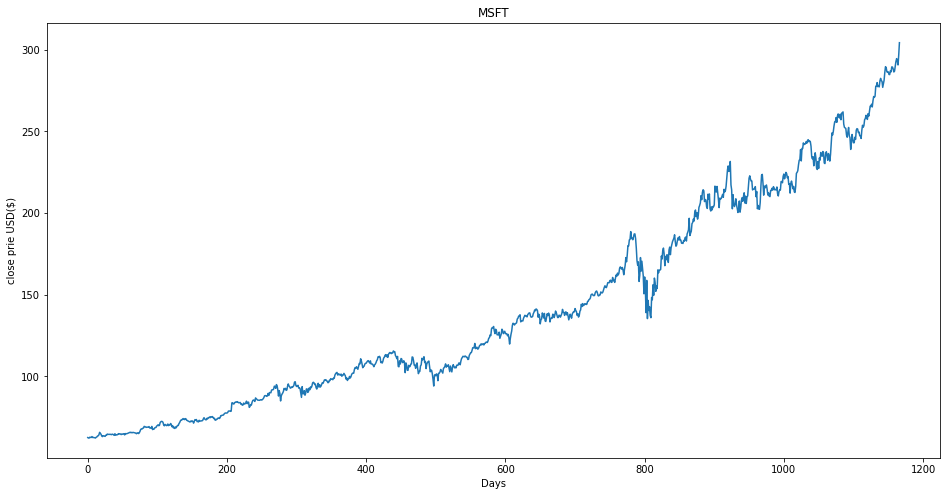

In [6]:
plt.figure(figsize =(16,8))
plt.title('MSFT')
plt.xlabel('Days')
plt.ylabel('close prie USD($)')
plt.plot(msft['Close'])
plt.show()

In [7]:
close_price = msft[['Close']]

# 4 years of closing price from 2017 -2021

In [8]:
close_price

,Close
0,62.580002
1,62.299999
2,62.299999
3,62.840000
4,62.639999
...,...
1162,294.600006
1163,293.079987
1164,290.730011
1165,296.769989


In [9]:
future_days = 45

close_price['prediction'] = close_price[['Close']].shift(-future_days)

In [10]:
close_price

,Close,prediction
0,62.580002,64.730003
1,62.299999,64.930000
2,62.299999,64.709999
3,62.840000,64.410004
4,62.639999,64.750000
...,...,...
1162,294.600006,NaN
1163,293.079987,NaN
1164,290.730011,NaN
1165,296.769989,NaN


In [11]:
X= np.array(close_price.drop(['prediction'],1))[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/1274731598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(close_price.drop(['prediction'],1))[:-future_days]


In [12]:
print(X)

[[ 62.58000183]
 [ 62.29999924]
 [ 62.29999924]
 ...
 [258.35998535]
 [257.38000488]
 [260.8999939 ]]


In [13]:
y= np.array(close_price['prediction'])[:-future_days]

In [14]:
print(y)

[ 64.73000336  64.93000031  64.70999908 ... 290.73001099 296.76998901
 304.35998535]


In [15]:
#split the data into 75% training and 25% testing 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=25)

# Tree model

In [16]:
#create the models
#create the decision tree regressor model
tree = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)

# linear regression model

In [17]:
#linear regression model
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)

In [18]:
x_future = close_price.drop(['prediction'], 1)[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4106418182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = close_price.drop(['prediction'], 1)[:-future_days]


In [19]:
x_future = x_future.tail(future_days)

In [20]:
x_future = np.array(x_future)
x_future

array([[259.5       ],
       [260.73999023],
       [258.73999023],
       [258.26000977],
       [260.57998657],
       [257.17001343],
       [261.1499939 ],
       [261.54998779],
       [261.97000122],
       [254.55999756],
       [252.50999451],
       [252.17999268],
       [251.86000061],
       [247.78999329],
       [246.47000122],
       [249.72999573],
       [252.46000671],
       [247.17999268],
       [246.22999573],
       [239.        ],
       [243.02999878],
       [248.1499939 ],
       [245.17999268],
       [243.08000183],
       [243.11999512],
       [246.47999573],
       [245.16999817],
       [250.77999878],
       [251.72000122],
       [251.49000549],
       [249.30999756],
       [249.67999268],
       [247.3999939 ],
       [247.30000305],
       [245.71000671],
       [250.78999329],
       [253.80999756],
       [252.57000732],
       [253.58999634],
       [257.23999023],
       [257.89001465],
       [259.89001465],
       [258.35998535],
       [257

In [21]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)

In [22]:
print(tree_prediction)

[259.42999268 262.63000488 265.51000977 265.26998901 266.69000244
 265.01998901 268.72000122 271.3999939  270.8999939  271.6000061
 277.6499939  277.66000366 279.92999268 277.42001343 277.94000244
 277.32000732 280.98001099 282.51000977 281.02999878 280.75
 277.01000977 279.32000732 281.3999939  286.14001465 289.67001343
 289.04998779 286.54000854 286.22000122 286.5        284.91000366
 284.82000732 287.11999512 286.51000977 289.51998901 289.45999146
 288.32998657 286.44000244 286.95001221 289.80999756 292.8500061
 294.6000061  259.42999268 290.73001099 296.76998901 304.35998535]


In [23]:
#show model linear regression predciton
lr_prediction = lr.predict(x_future)

In [24]:
lr_prediction 

array([276.42451192, 277.746425  , 275.61429034, 275.10259884,
       277.57585033, 273.94058935, 278.18351652, 278.60993694,
       279.05769954, 271.1581367 , 268.97269541, 268.62089124,
       268.27975815, 263.9408563 , 262.53365588, 266.00902953,
       268.91940506, 263.29055458, 262.27779386, 254.5701316 ,
       258.86638165, 264.32464119, 261.15841991, 258.91968827,
       258.96232381, 262.5443107 , 261.14776509, 267.12840348,
       268.13050938, 267.88531845, 265.5612832 , 265.95572291,
       263.52509069, 263.41849372, 261.72345056, 267.1390583 ,
       270.3585862 , 269.03667312, 270.12405008, 274.01518934,
       274.70815913, 276.8402938 , 275.20917955, 274.16445438,
       277.91699968])

In [25]:
#visualized the data
predictions = tree_prediction 
valid = close_price[X.shape[0]:]

# Graph for Tree model

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4170329595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


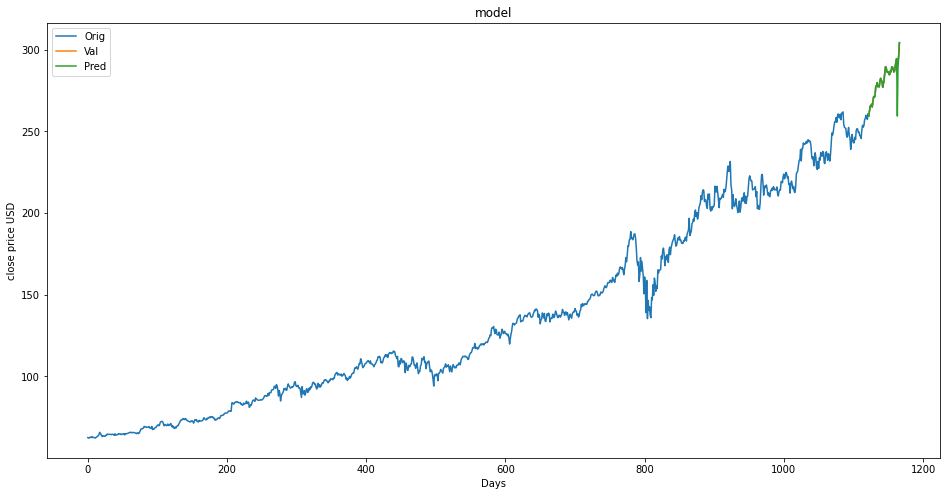

In [26]:
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

# Graph for linear regression model

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4052443177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


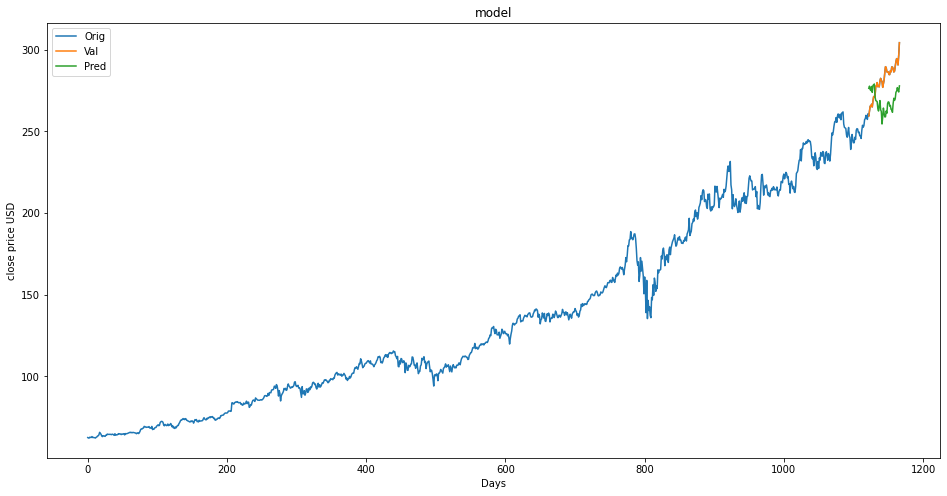

In [27]:
predictions = lr_prediction 
valid = close_price[X.shape[0]:]
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

# Antero Resources 

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The company was formerly known as Antero Resources Appalachian Corporation and changed its name to Antero Resources Corporation in June 2013. Antero Resources Corporation was founded in 2002 and is headquartered in Denver, Colorado.'

In [28]:
AR = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/AR_stock.csv')
AR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,23.889999,24.580000,23.070000,23.680000,23.680000,6148400
1,2017-01-04,23.709999,24.730000,23.650000,24.629999,24.629999,4054600
2,2017-01-05,24.629999,25.180000,24.280001,24.889999,24.889999,4756200
3,2017-01-06,25.049999,25.200001,24.520000,24.680000,24.680000,2689100
4,2017-01-09,24.410000,24.660000,24.090000,24.120001,24.120001,2450100
...,...,...,...,...,...,...,...
1162,2021-08-16,12.500000,12.810000,12.160000,12.570000,12.570000,5752500
1163,2021-08-17,12.470000,12.950000,12.360000,12.680000,12.680000,5576400
1164,2021-08-18,12.640000,12.850000,11.890000,11.990000,11.990000,7881600
1165,2021-08-19,11.710000,11.870000,10.910000,11.380000,11.380000,11457100


In [29]:
AR = AR[['Date', 'Close']]

In [30]:
new_AR = AR.loc[884:1167]

In [31]:
AR.shape

(1167, 2)

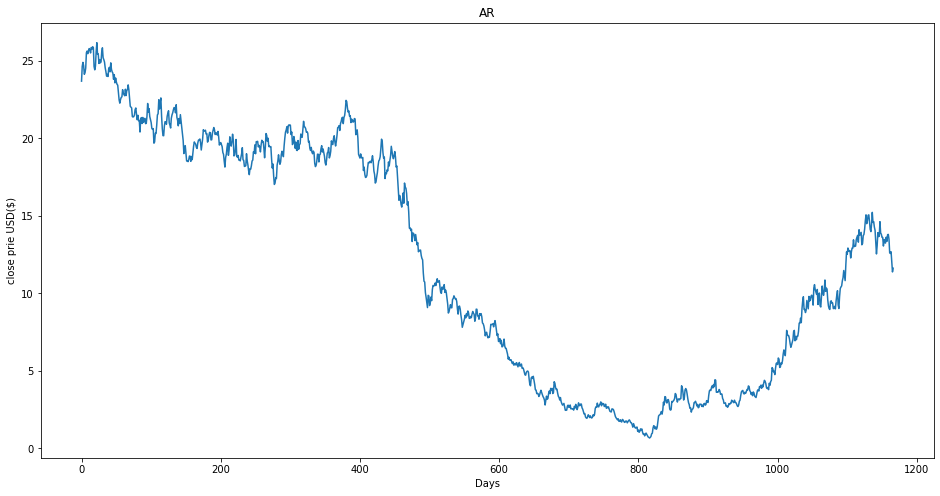

In [32]:
plt.figure(figsize =(16,8))
plt.title('AR')
plt.xlabel('Days')
plt.ylabel('close prie USD($)')
plt.plot(AR['Close'])
plt.show()

In [33]:
close_price = AR[['Close']]
close_price

,Close
0,23.680000
1,24.629999
2,24.889999
3,24.680000
4,24.120001
...,...
1162,12.570000
1163,12.680000
1164,11.990000
1165,11.380000


In [34]:
future_days = 45

close_price['prediction'] = close_price[['Close']].shift(-future_days)

In [35]:
X= np.array(close_price.drop(['prediction'],1))[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/1274731598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(close_price.drop(['prediction'],1))[:-future_days]


In [36]:
y= np.array(close_price['prediction'])[:-future_days]

In [37]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=25)

In [38]:
tree = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)
print(tree)


DecisionTreeRegressor()


In [39]:
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)
lr

LinearRegression()

In [40]:
x_future = close_price.drop(['prediction'], 1)[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4106418182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = close_price.drop(['prediction'], 1)[:-future_days]


In [41]:
x_future = x_future.tail(future_days)

In [42]:
x_future = np.array(x_future)
x_future

array([[ 9.52000046],
       [ 9.35999966],
       [ 9.38000011],
       [ 9.02000046],
       [ 9.02000046],
       [ 9.15999985],
       [ 9.        ],
       [ 9.5       ],
       [ 9.88000011],
       [10.17000008],
       [ 9.25      ],
       [ 9.02000046],
       [ 9.78999996],
       [10.31000042],
       [10.40999985],
       [10.47999954],
       [10.81000042],
       [11.01000023],
       [11.47000027],
       [11.13000011],
       [10.81999969],
       [11.84000015],
       [12.67000008],
       [12.52000046],
       [12.92000008],
       [12.72000027],
       [12.76000023],
       [12.73999977],
       [12.27999973],
       [12.68000031],
       [12.92000008],
       [12.90999985],
       [13.44999981],
       [13.01000023],
       [13.06000042],
       [13.03999996],
       [13.47000027],
       [13.61999989],
       [13.73999977],
       [13.30000019],
       [14.10000038],
       [13.73999977],
       [13.84000015],
       [13.93000031],
       [13.13000011]])

In [43]:
tree_prediction = tree.predict(x_future)

In [44]:
print(tree_prediction)

[13.21000004 13.72000027 13.80000019 14.31666692 14.31666692 15.06000042
 11.10000006 14.68000031 13.01999998 15.06000042 11.82500029 14.31666692
 13.97999954 11.33999968 11.97000027 14.56999969 14.61999989 14.27000046
 14.06000042 13.23999977 10.5250001  13.06999969 13.90999985 13.65999985
 13.36500025 14.61999989 13.89000034 13.81000042 13.60999966 11.32000017
 13.36500025 13.47000027 13.27000046 13.23999977 13.61999989 13.35000038
 13.77999973 13.80000019 11.44500017 12.60999966 12.56999969 11.44500017
 11.98999977 11.38000011 10.17499971]


In [45]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[ 9.30117973  9.15698269  9.17500764  8.85056623  8.85056623  8.97673746
  8.83254128  9.28315478  9.62562114  9.88697693  9.05784803  8.85056623
  9.54451057 10.01314902 10.10327121 10.16635682 10.46376252 10.64400775
 11.05857221 10.75215489 10.47277414 11.39202609 12.14004444 12.00486073
 12.36535119 12.18510596 12.221155   12.20313005 11.7885656  12.14905691
 12.36535119 12.35633871 12.84300126 12.44646175 12.49152328 12.47349832
 12.86102621 12.99620991 13.10435705 12.70781755 13.42879932 13.10435705
 13.19448009 13.27559066 12.55460889]


In [46]:
predictions = tree_prediction 
valid = close_price[X.shape[0]:]

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4170329595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


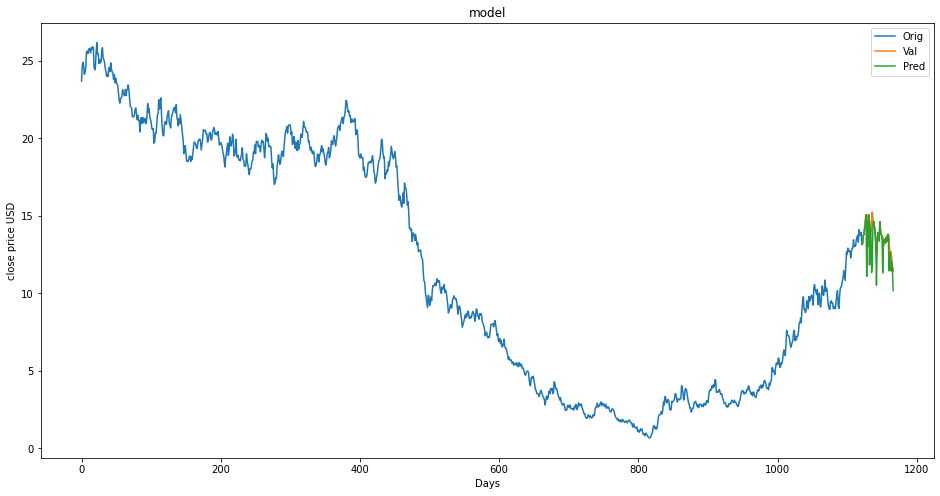

In [47]:
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\steve\AppData\Local\Temp/ipykernel_25308/4052443177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


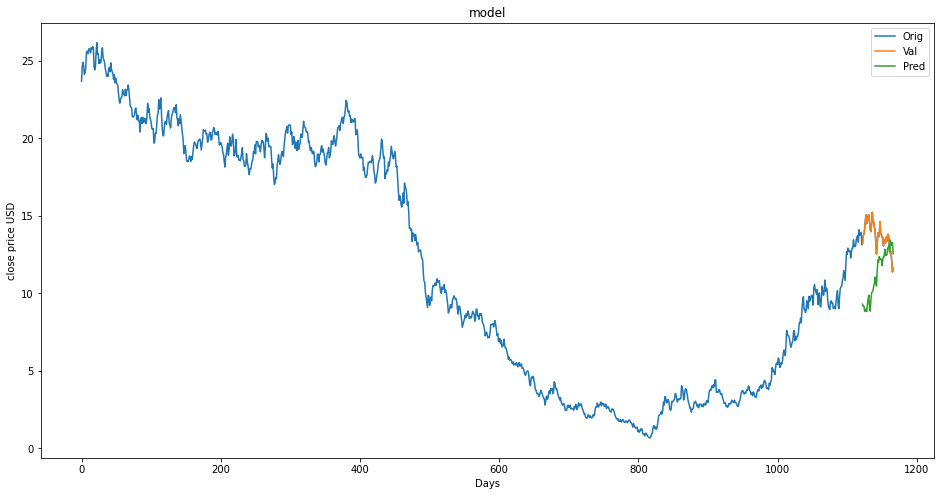

In [48]:
predictions = lr_prediction 
valid = close_price[X.shape[0]:]
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [49]:
import yfinance as yf

In [50]:
tickers3 = ['AR']

In [89]:
msft = yf.Ticker("MSFT")
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610974647,2021-06-29,0.0813,165513031872
1,Blackrock Inc.,505662500,2021-06-29,0.0673,136983971250
2,State Street Corporation,294824958,2021-06-29,0.0392,79868081122
3,"FMR, LLC",218007132,2021-06-29,0.0290,59058132058
4,Price (T.Rowe) Associates Inc,192408922,2021-06-29,0.0256,52123576969
5,"Geode Capital Management, LLC",123322145,2021-06-29,0.0164,33407969080
6,Capital World Investors,110830050,2021-06-29,0.0147,30023860545
7,Capital Research Global Investors,94576657,2021-06-29,0.0126,25620816381
8,Capital International Investors,92898047,2021-06-29,0.0124,25166080932
9,Northern Trust Corporation,88583941,2021-06-29,0.0118,23997389616


In [87]:
ar = yf.Ticker("AR")


In [52]:
ar.info["longBusinessSummary"]

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The compa

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The company was formerly known as Antero Resources Appalachian Corporation and changed its name to Antero Resources Corporation in June 2013. Antero Resources Corporation was founded in 2002 and is headquartered in Denver, Colorado.'

In [53]:
ar.major_holders

,0,1
0,10.35%,% of Shares Held by All Insider
1,76.02%,% of Shares Held by Institutions
2,84.80%,% of Float Held by Institutions
3,330,Number of Institutions Holding Shares


In [54]:
ar.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",25013326,2021-06-29,0.0797,375950289
1,Blackrock Inc.,22218324,2021-06-29,0.0708,333941409
2,"FMR, LLC",16641527,2021-06-29,0.0530,250122150
3,State Street Corporation,13279355,2021-06-29,0.0423,199588705
4,Dimensional Fund Advisors LP,11405981,2021-06-29,0.0363,171431894
5,"Yorktown Energy Partners VIII, L.P.",9382570,2021-06-29,0.0299,141020027
6,SailingStone Capital Partners LLC,9289328,2021-06-29,0.0296,139618599
7,"Graham Capital Management, L.P.",7535078,2021-06-29,0.0240,113252222
8,"FPR Partners, LLC",6937559,2021-06-29,0.0221,104271511
9,"Goldman Sachs Group, Inc.",6590353,2021-06-29,0.0210,99053005


In [55]:
ar.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,13.29
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


# ARIMA

AutoRegressive Integrated Moving Average

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [58]:
ARs = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/AR_stock.csv')
ARss = ARs[['Close']].copy()
ARss.describe()


,Close
count,1167.000000
mean,11.885313
std,7.687566
min,0.670000
25%,3.745000
50%,10.410000
75%,19.410000
max,26.160000


In [85]:
ARss

,Close
0,23.680000
1,24.629999
2,24.889999
3,24.680000
4,24.120001
...,...
1162,12.570000
1163,12.680000
1164,11.990000
1165,11.380000


In [59]:
result = adfuller(ARss.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic: -1.5348791916810662
p-value:0.5161919986533621


# A stationary time series is one whose properties do not depend on the time at which the series is observed. If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

# d, the number of differencing required to make the time series stationary

In [60]:
from pmdarima.arima.utils import ndiffs
ndiffs(ARss.Close, test='adf')

1

# P, Order of AR term

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf

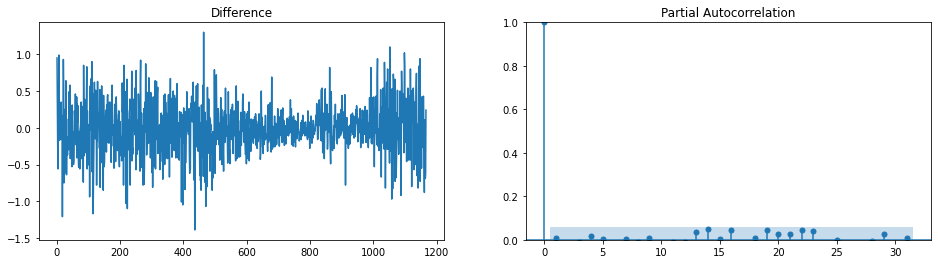

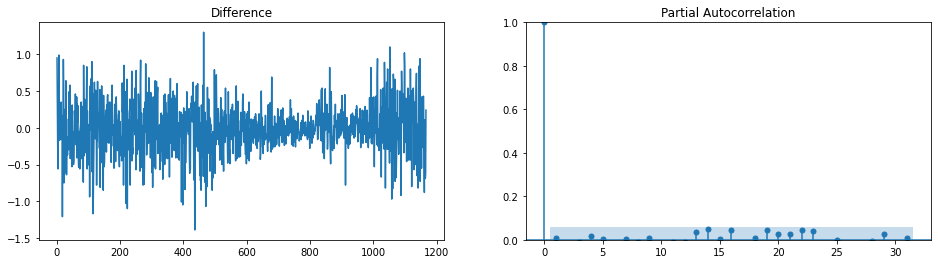

In [62]:

diff = ARss.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2)

#lag 14

# q, the # of MA TERM

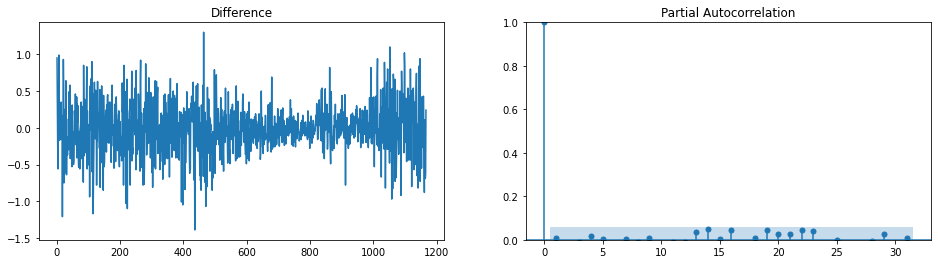

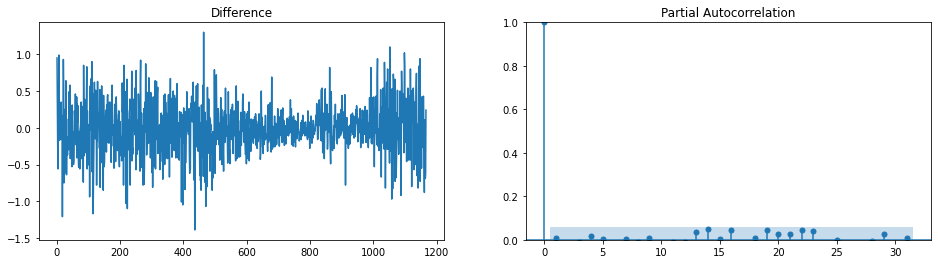

In [63]:

diff = ARss.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2)

q#16

# Train test split

In [66]:
n = int(len(ARss)*0.8)
train = ARss.Close[:n]
test = ARss.Close[n:]
print(len(train))
print(len(test))

933
234


In [67]:
model = ARIMA(train, order= (14,1,16))
result = model.fit(disp=0)

C:\Users\steve\miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\steve\miniconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  wa

In [81]:
model = ARIMA(train, order= (6,1,9))
results = model.fit(disp=0)

C:\Users\steve\miniconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [68]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  932
Model:               ARIMA(14, 1, 16)   Log Likelihood                -263.622
Method:                       css-mle   S.D. of innovations              0.318
Date:                Fri, 01 Oct 2021   AIC                            591.243
Time:                        19:30:17   BIC                            746.038
Sample:                             1   HQIC                           650.277
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0228      0.009     -2.516      0.012      -0.041      -0.005
ar.L1.D.Close      0.0057      0.184      0.031      0.975      -0.354       0.366
ar.L2.D.Close      0.1123      0.156

C:\Users\steve\miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [69]:
step = 30
fc, se, conf = result.forecast(step)
fc

array([2.95598982, 2.88402058, 2.88441788, 2.90098074, 2.77972391,
       2.79914585, 2.77443409, 2.72732665, 2.61012803, 2.56314679,
       2.54648759, 2.55886071, 2.61453588, 2.54401645, 2.56061024,
       2.51616941, 2.55290983, 2.56452433, 2.49924604, 2.49492984,
       2.48989249, 2.48592107, 2.37036805, 2.3501858 , 2.23911399,
       2.20389385, 2.27949724, 2.20675805, 2.16355309, 2.1478077 ])

In [70]:
conf

array([[ 2.33206364,  3.579916  ],
       [ 1.99467601,  3.77336515],
       [ 1.80228305,  3.9665527 ],
       [ 1.67159212,  4.13036936],
       [ 1.41676161,  4.14268622],
       [ 1.30494053,  4.29335118],
       [ 1.15857694,  4.39029124],
       [ 1.00089109,  4.45376221],
       [ 0.78224211,  4.43801395],
       [ 0.64520269,  4.48109088],
       [ 0.54755922,  4.54541596],
       [ 0.48512081,  4.63260061],
       [ 0.47010159,  4.75897017],
       [ 0.32597777,  4.76205513],
       [ 0.26943934,  4.85178114],
       [ 0.1569249 ,  4.87541391],
       [ 0.13069633,  4.97512334],
       [ 0.08670445,  5.04234422],
       [-0.03128958,  5.02978167],
       [-0.09261953,  5.08247921],
       [-0.15648055,  5.13626553],
       [-0.21697421,  5.18881634],
       [-0.39129924,  5.13203534],
       [-0.46814206,  5.16851365],
       [-0.63097158,  5.10919955],
       [-0.71831648,  5.12610417],
       [-0.69266808,  5.25166256],
       [-0.81304974,  5.22656584],
       [-0.90769286,

In [71]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:,0], index=test[:step].index)
upper = pd.Series(conf[:,1], index=test[:step].index)

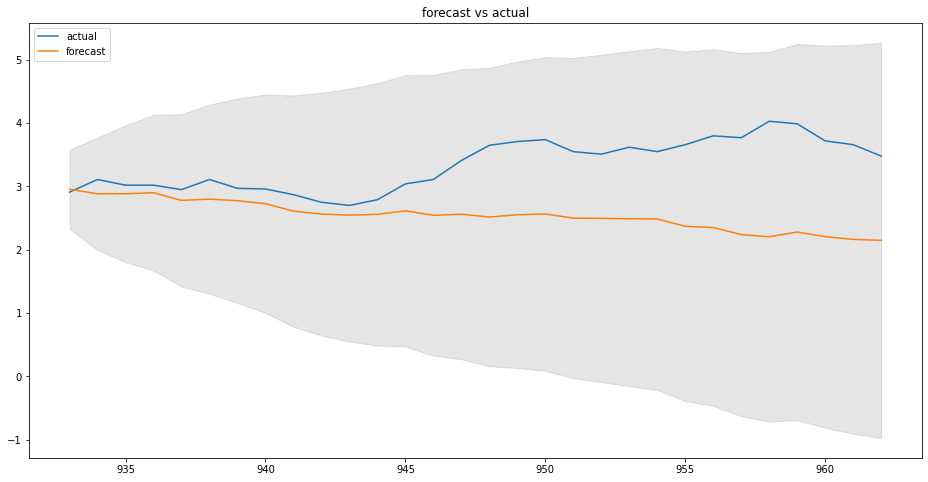

In [72]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title("forecast vs actual")
plt.legend(loc='upper left')

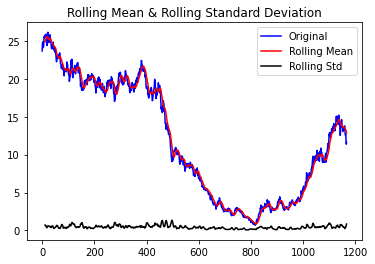

In [73]:
rolling_mean = ARss.rolling(window = 12).mean()
rolling_std = ARss.rolling(window = 12).std()
plt.plot(ARss, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

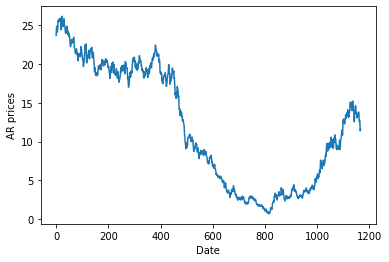

In [74]:
plt.xlabel('Date')
plt.ylabel('AR prices')
plt.plot(ARss)

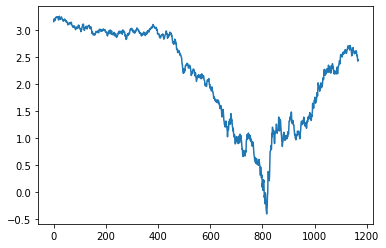

In [75]:
df_log = np.log(ARss)
plt.plot(df_log)

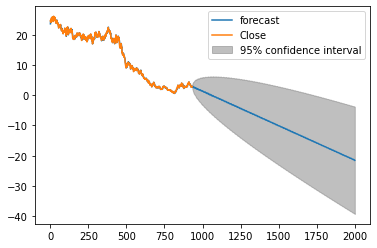

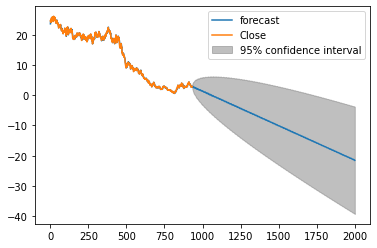

In [79]:
result.plot_predict(1,2000)

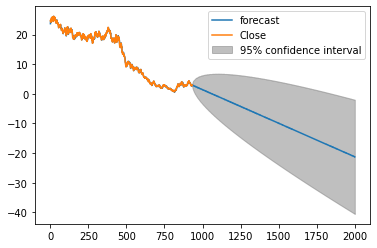

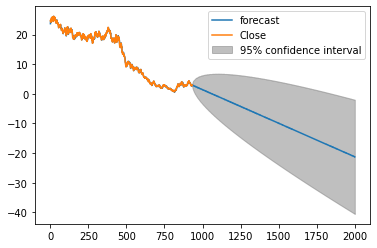

In [82]:
results.plot_predict(1,2000)

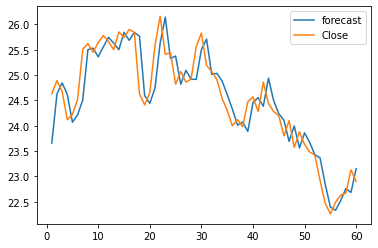

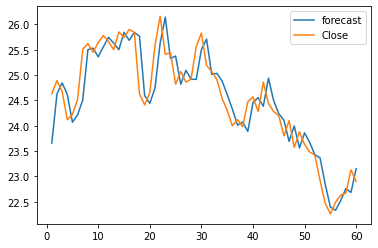

In [83]:
result.plot_predict(start=1, end=60, dynamic= False)ww

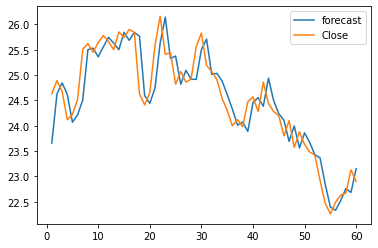

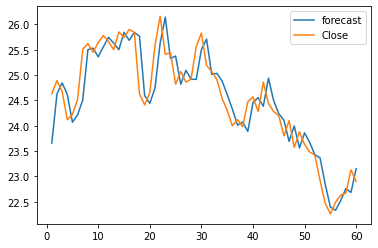

In [84]:
results.plot_predict(start=1, end=60, dynamic= False)